# Step 3

Make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

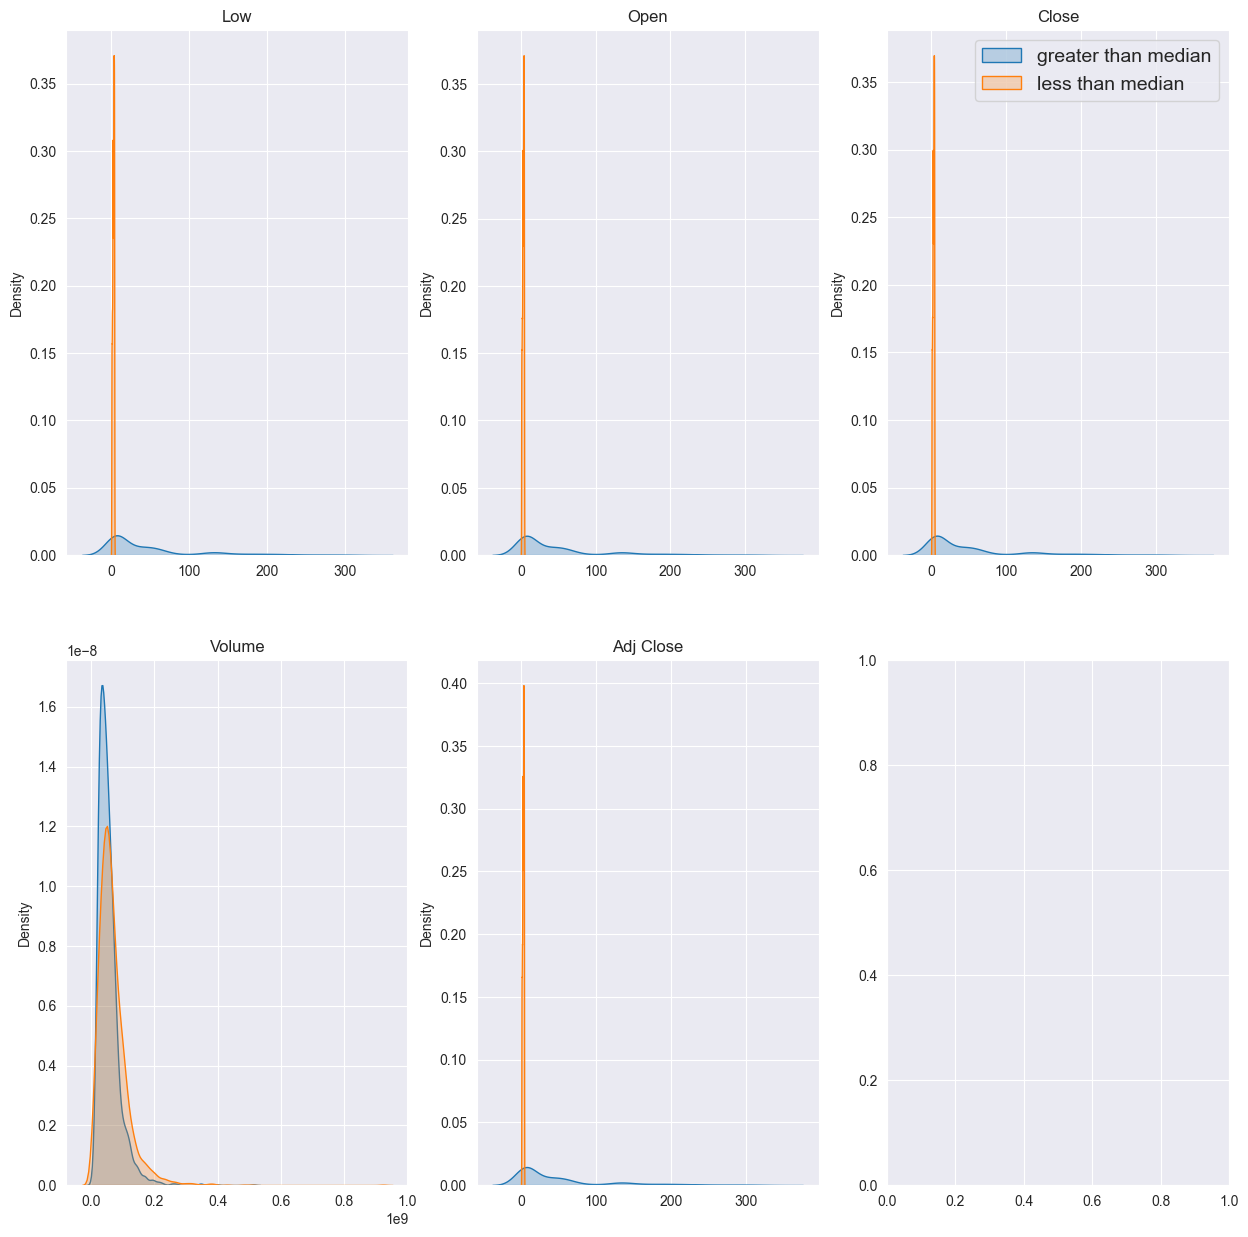

In [44]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

res = pd.read_csv('data/NVIDIA Corporation.csv', header=0, encoding='unicode_escape')

res['median'] = np.where(res['Adj Close']>=res['Adj Close'].median(), 'greater', 'less')


fig1 = plt.subplots(2, 3, figsize = (15, 15))

for i, col in enumerate(res.columns.tolist()[2:-1]):

    plt.subplot(2, 3, i + 1)

    sns.kdeplot(res.loc[res['median'] == 'greater', col], shade = True, label = 'greater than median')
    sns.kdeplot(res.loc[res['median'] == 'less', col], shade = True, label = "less than median")

    plt.xlabel('')
    plt.title(col)

    if i == 2:
        plt.legend(loc = 'upper right', fontsize = 14)
    else:
        plt.legend().remove()

plt.show()
res = res.drop(columns=['Date', 'Volume'])

In [45]:
greater = res.loc[res['median'] == 'greater']
print("Mean value of rows that are greater than median:")
greater.mean().round(5)

Mean value of rows that are greater than median:


High         54.84785
Low          52.75638
Open         53.83938
Close        53.83355
Adj Close    53.52419
dtype: float64

In [46]:
print("Variance of rows that are greater than median:")
greater.var().round(5)

Variance of rows that are greater than median:


High         5122.84833
Low          4689.87064
Open         4916.59146
Close        4907.52722
Adj Close    4916.31091
dtype: float64

In [47]:
less = res.loc[res['median'] == 'less']
print("Mean value of rows that are less than median:")
less.mean().round(5)

Mean value of rows that are less than median:


High         2.52120
Low          2.40439
Open         2.46312
Close        2.46189
Adj Close    2.26596
dtype: float64

In [48]:
print("Variance of rows that are less than median:")
less.var().round(5)

Variance of rows that are less than median:


High         1.15929
Low          1.09864
Open         1.13050
Close        1.12921
Adj Close    0.96557
dtype: float64